In [261]:
# First import the necessary libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [263]:
import os

# Assign training and validation set directories
BASE_DIR = 'cats_and_dogs_birds_filtered'

train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_birds_dir = os.path.join(train_dir, 'birds')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_birds_dir = os.path.join(validation_dir, 'birds')

print(f"Contents of base directory: {os.listdir(BASE_DIR)}")

print(f"\nContents of train directory: {os.listdir(train_dir)}")

print(f"\nContents of validation directory: {os.listdir(validation_dir)}")

Contents of base directory: ['.ipynb_checkpoints', 'train', 'validation']

Contents of train directory: ['birds', 'cats', 'dogs']

Contents of validation directory: ['.ipynb_checkpoints', 'birds', 'cats', 'dogs']


In [265]:
# Constant for epochs
EPOCHS = 20

# Function to create a model suitable for multi-class classification
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        # Output layer for multi-class classification
        tf.keras.layers.Dense(3, activation='softmax')  # 3 units for 3 classes
    ])
    return model

# Create a new model
model = create_model()

# Compile the model with appropriate settings for multi-class classification
model.compile(
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Train the model using the optimized datasets
history = model.fit(
    train_dataset_final,
    epochs=EPOCHS,
    validation_data=validation_dataset_final,
    verbose=2
)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 - 9s - 4s/step - accuracy: 0.4815 - loss: 1.7374 - val_accuracy: 0.1778 - val_loss: 23.0846
Epoch 2/20
2/2 - 2s - 1s/step - accuracy: 0.8889 - loss: 0.2275 - val_accuracy: 0.1778 - val_loss: 20.5416
Epoch 3/20
2/2 - 2s - 1s/step - accuracy: 0.9630 - loss: 0.1500 - val_accuracy: 0.1778 - val_loss: 15.4929
Epoch 4/20
2/2 - 2s - 1s/step - accuracy: 0.9630 - loss: 0.1110 - val_accuracy: 0.1778 - val_loss: 10.0437
Epoch 5/20
2/2 - 2s - 1s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.1778 - val_loss: 10.4267
Epoch 6/20
2/2 - 3s - 1s/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.1778 - val_loss: 8.3238
Epoch 7/20
2/2 - 2s - 1s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.1778 - val_loss: 7.4632
Epoch 8/20
2/2 - 2s - 1s/step - accuracy: 1.0000 - loss: 0.0136 - val_accuracy: 0.1778 - val_loss: 7.6576
Epoch 9/20
2/2 - 2s - 1s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.1778 - val_loss: 6.9059
Epoch 10/20
2/2 - 2s - 1s/step - accuracy

In [291]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("Accuracy:",val_acc)
print("Loss:",loss)

Accuracy: [0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.20000000298023224, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768, 0.17777778208255768]
Loss: [1.7373675107955933, 0.22745253145694733, 0.1500432789325714, 0.1110343411564827, 0.009691804647445679, 0.02018117904663086, 0.005926409736275673, 0.013603844679892063, 0.005662556272000074, 0.012439494021236897, 0.011357598938047886, 0.03849618509411812, 0.014068173244595528, 0.011340860277414322, 0.023360952734947205, 0.0026931262109428644, 0.002901103813201189, 0.0011905425926670432, 0.0034843729808926582, 0.00256543792784214]


In [293]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

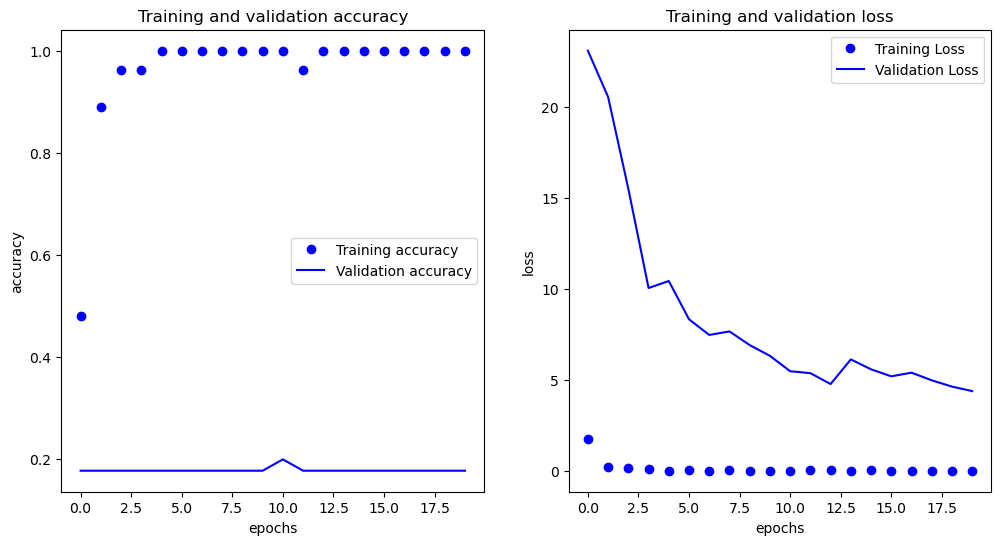

In [295]:
# Plot training results
plot_loss_acc(history)

In [297]:
# Define fill mode.
FILL_MODE = 'nearest'

# Create the augmentation model.
data_augmentation = tf.keras.Sequential([
    # Specify the input shape.
    tf.keras.Input(shape=(150,150,3)),
    # Add the augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2,0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
    ])

In [299]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(NUM_AUG):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, NUM_AUG + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

In [301]:
# Get a batch of images
sample_batch = list(train_dataset.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

images per batch: 20


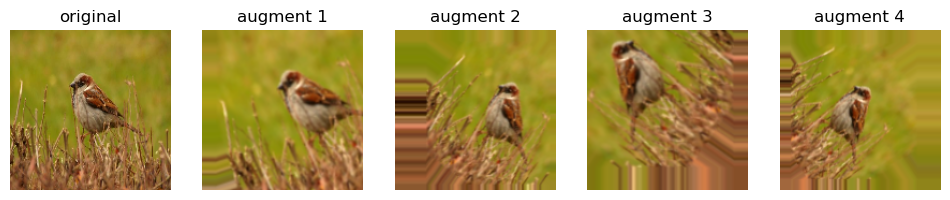

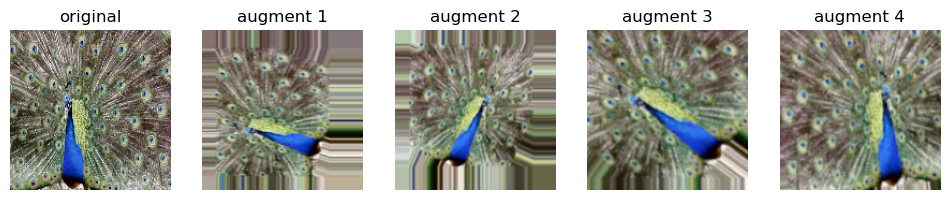

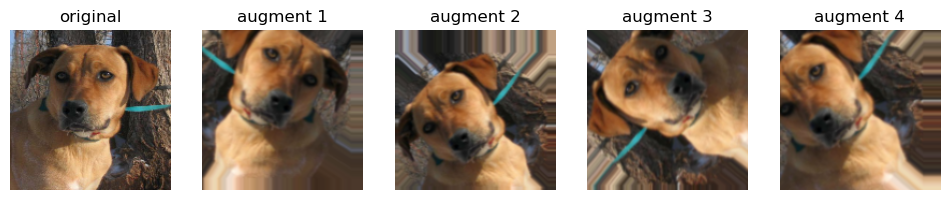

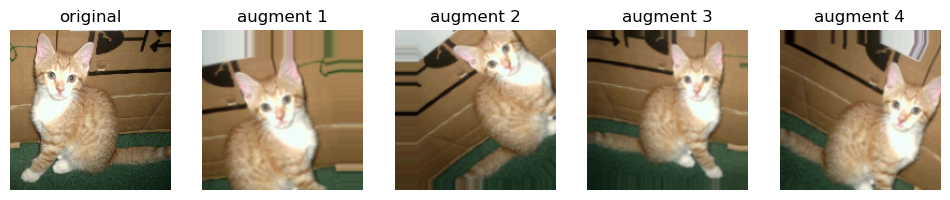

In [303]:
NUM_AUG = 4

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[1], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[2], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[3], data_augmentation, NUM_AUG)

# Uncomment the line below to delete the variable to free up some memory
# del sample_batch

In [319]:
# Instantiate the base model
model_without_aug = create_model()

# Prepend the data augmentation layers to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model_without_aug
])
# Compile the model
model_with_aug.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [321]:
EPOCHS=30

# Train the new model
history_with_aug = model_with_aug.fit(
      train_dataset_final,
      epochs=EPOCHS,
      validation_data=validation_dataset_final,
      verbose=2)

Epoch 1/30
2/2 - 11s - 6s/step - accuracy: 0.3333 - loss: 2.3298 - val_accuracy: 0.1778 - val_loss: 44.4215
Epoch 2/30
2/2 - 2s - 1s/step - accuracy: 0.5926 - loss: 1.6268 - val_accuracy: 0.1778 - val_loss: 31.9124
Epoch 3/30
2/2 - 2s - 1s/step - accuracy: 0.6667 - loss: 0.8879 - val_accuracy: 0.1778 - val_loss: 26.1219
Epoch 4/30
2/2 - 2s - 1s/step - accuracy: 0.7778 - loss: 0.9636 - val_accuracy: 0.1778 - val_loss: 20.6479
Epoch 5/30
2/2 - 2s - 1s/step - accuracy: 0.8148 - loss: 0.7105 - val_accuracy: 0.1778 - val_loss: 18.1925
Epoch 6/30
2/2 - 2s - 850ms/step - accuracy: 0.6296 - loss: 1.0333 - val_accuracy: 0.1778 - val_loss: 21.1445
Epoch 7/30
2/2 - 2s - 854ms/step - accuracy: 0.6296 - loss: 0.9854 - val_accuracy: 0.1778 - val_loss: 18.0649
Epoch 8/30
2/2 - 1s - 705ms/step - accuracy: 0.7037 - loss: 0.7908 - val_accuracy: 0.1778 - val_loss: 17.7383
Epoch 9/30
2/2 - 3s - 1s/step - accuracy: 0.7407 - loss: 0.7891 - val_accuracy: 0.1778 - val_loss: 16.9760
Epoch 10/30
2/2 - 2s - 1s/s

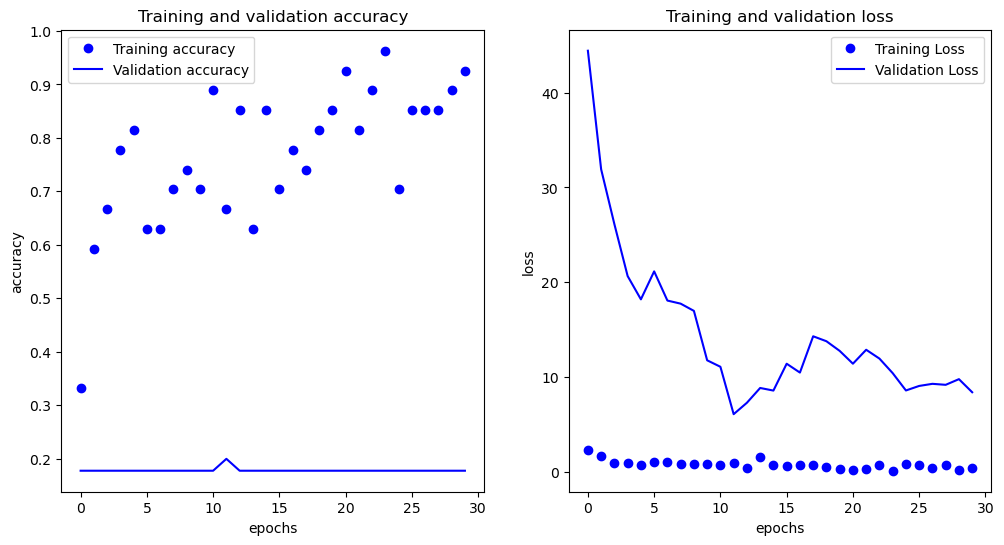

In [325]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

In [327]:
import pandas as pd
import numpy as np
# List to store folder names
foldernames = [name.split('.')[0] for name in os.listdir('cats_and_dogs_birds_filtered/train')]

print('File Names:', foldernames)


File Names: ['birds', 'cats', 'dogs']


In [329]:
train_filenames = [name for name in os.listdir('cats_and_dogs_birds_filtered/train'.format(name)) ]
test_filenames = [name for name in os.listdir('cats_and_dogs_birds_filtered/validation'.format(name)) ]
print('Total files in train folder', len(train_filenames))
print('Total files in test folder', len(test_filenames))

Total files in train folder 3
Total files in test folder 4


In [331]:
def to_df(filenames,name):
    files = []
    label = []
    for name in filenames:
        files.append(name)
        label.append(name[:3]) # Use first 2 characters to create label name
    df = pd.DataFrame({'filename':files,'label':label})
    return df
df_train = to_df(train_filenames,name) 
df_test = to_df(test_filenames,name)

In [333]:
df_train.head(5)


,filename,label
0,birds,bir
1,cats,cat
2,dogs,dog


Data Distribution label
bir    1
cat    1
dog    1
Name: count, dtype: int64


<Axes: title={'center': 'Types of Images'}, ylabel='count'>

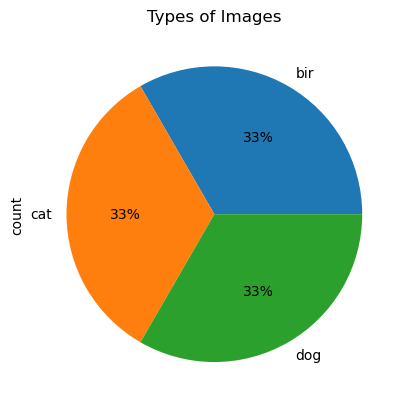

In [335]:
print('Data Distribution',df_train['label'].value_counts())

df_train['label'].value_counts().plot(kind='pie',autopct='%0.f%%',title='Types of Images')


In [337]:
#Generate Random Images for Cat, Dogs, and Birds
cat_files = [name for i,name in enumerate(df_train['filename']) if df_train.iloc[i,1] == 'cat']
dog_files = [name for i,name in enumerate(df_train['filename']) if df_train.iloc[i,1] == 'dog']
bird_files = [name for i,name in enumerate(df_train['filename']) if df_train.iloc[i,1] == 'bird']

In [339]:
import os

# Define the correct path to the folder
folder_path = 'C:\\Users\\DELL\\Jupyter notebook\\cats_and_dogs_birds_filtered\\train\\'

# Check if the path exists
if os.path.exists(folder_path):
    # List all files in the directory
    print("Files in directory:", os.listdir(folder_path))
else:
    print("The specified directory does not exist:", folder_path)


Files in directory: ['birds', 'cats', 'dogs']


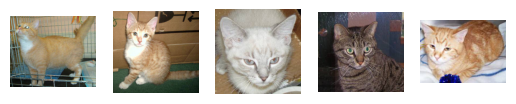

In [349]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Correct folder path
folder_path = 'C:\\Users\\DELL\\Jupyter notebook\\cats_and_dogs_birds_filtered\\train\\cats'
# List of image filenames (replace with actual image names in the folder)
cat_files =['cat.1.jpg', 'cat.14.jpg', 'cat.154.jpg', 'cat.167.jpg', 'cat.39.jpg', 'cat.42.jpg', 'cat.586.jpg', 'cat.832.jpg', 'cat.870.jpg'] # Example filenames
# Check if directory exists and we have access
if not os.path.exists(folder_path):
    print("The specified directory does not exist:", folder_path)
else:
    # Plot random images from the cat_files list
        for i, name in enumerate(np.random.randint(0, len(cat_files), 5)):
            plt.subplot(1, 5, i + 1)
            # Construct the full file path using os.path.join
            filename = os.path.join(folder_path, cat_files[name])
            # Read and display the image
            image = imread(filename)
            plt.imshow(image)
            plt.axis('off')
            # Show all subplots
        plt.show()

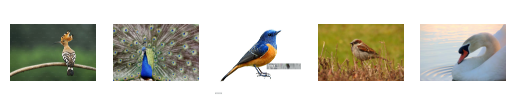

In [351]:
# Correct folder path
folder_path = 'C:\\Users\\DELL\\Jupyter notebook\\cats_and_dogs_birds_filtered\\train\\birds'

# List of image filenames (replace with actual image names in the folder)
bird_files =['bird', 'bird2.jpg', 'bird3.jpeg', 'bird4.jpg', 'bird5.jpg', 'bird6.jpg', 'bird7.jpg', 'bird8.jpg', 'bird9.jpg'] # Example filenames
# Check if directory exists and we have access
if not os.path.exists(folder_path):
    print("The specified directory does not exist:", folder_path)
else:
    # Plot random images from the bird_files list
        for i, name in enumerate(np.random.randint(0, len(bird_files), 5)):
            plt.subplot(1, 5, i + 1)
            # Construct the full file path using os.path.join
            filename = os.path.join(folder_path, bird_files[name])
            # Read and display the image
            image = imread(filename)
            plt.imshow(image)
            plt.axis('off')
            # Show all subplots
        plt.show()

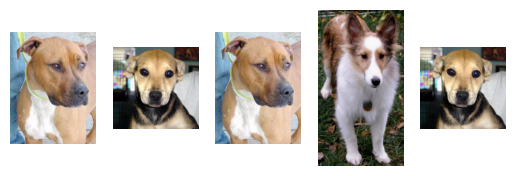

In [353]:
# Correct folder path
folder_path = 'C:\\Users\\DELL\\Jupyter notebook\\cats_and_dogs_birds_filtered\\train\\dogs'

# List of image filenames (replace with actual image names in the folder)
dog_files =['dog.105.jpg', 'dog.117.jpg', 'dog.13.jpg', 'dog.24.jpg', 'dog.31.jpg', 'dog.4.jpg', 'dog.51.jpg', 'dog.94.jpg', 'dog.99.jpg']  # Example filenames
# Check if directory exists and we have access
if not os.path.exists(folder_path):
    print("The specified directory does not exist:", folder_path)
else:
    # Plot random images from the dog_files list
        for i, name in enumerate(np.random.randint(0, len(bird_files), 5)):
            plt.subplot(1, 5, i + 1)
            # Construct the full file path using os.path.join
            filename = os.path.join(folder_path,dog_files[name])
            # Read and display the image
            image = imread(filename)
            plt.imshow(image)
            plt.axis('off')
            # Show all subplots
        plt.show()

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_train,test_size =0.2,random_state = 42)
X_train.shape, X_test.shape

((2, 2), (1, 2))

Train Data Distribution label
cat    1
dog    1
Name: count, dtype: int64
Test Data Distribution label
bir    1
Name: count, dtype: int64


<Axes: title={'center': 'Test Data Distribution'}, ylabel='count'>

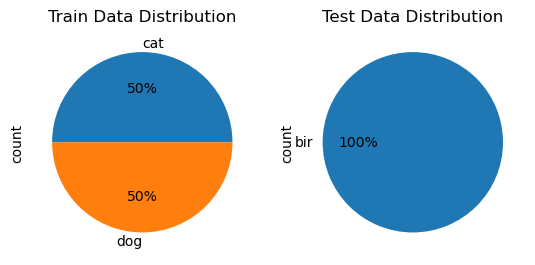

In [357]:
plt.subplot(1,2,1)
print('Train Data Distribution',X_train['label'].value_counts())

X_train['label'].value_counts().plot(kind='pie',autopct='%0.f%%',title='Train Data Distribution')

plt.subplot(1,2,2)
print('Test Data Distribution',X_test['label'].value_counts())

X_test['label'].value_counts().plot(kind='pie',autopct='%0.f%%',title='Test Data Distribution')